# Introduction

## Recognition of Speaker using Gaussian Mixture Models
#### *Dataset was created from random youtube clips.

In [1]:
# imports
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
from scipy .io import wavfile
import time
from sklearn.metrics import confusion_matrix

from utils_cm import plot_confusion_matrix

from python_speech_features import mfcc, logfbank , delta


## Testing Models with Two Probes and Three Genuine Samples

*`Reading Data`*

In [3]:
# Stores Training Data
sample_rate_training = []
wave_data_training = []
# Stores Testing Data
sample_rate_testing = []
wave_data_testing = []

# Formats the Input paths for the Data
num = '0'
train_addr = '_train.wav'
test_addr = '_test.wav'

# Number of samples for training and testing
train_samples = 5
test_samples = 5

# Input of training data, from sample 1-5
for i in range(train_samples):
    samplerate_tr , wave_data_tr = wavfile.read(num + '%d'%(i+1) + train_addr )
    
    sample_rate_training.append(samplerate_tr)
    wave_data_training.append(wave_data_tr)
    
# Input of testing data, from sample 3-7    
for i in range(test_samples):
    samplerate_te , wave_data_te = wavfile.read(num + '%d'%(i+3) + test_addr )
    
    sample_rate_testing.append(samplerate_te)
    wave_data_testing.append(wave_data_te)


8000

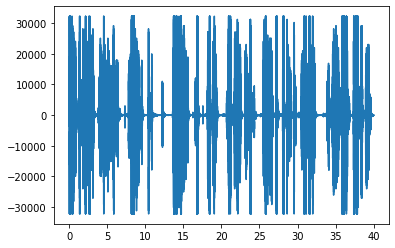

In [4]:
# Visualizing the first Audio Sample from testing data
length = wave_data_testing[0].shape[0]/sample_rate_testing[0]
time = np.linspace(0., length, wave_data_testing[0].shape[0])

plt.plot(time, wave_data_testing[0][:], label="Left channel")

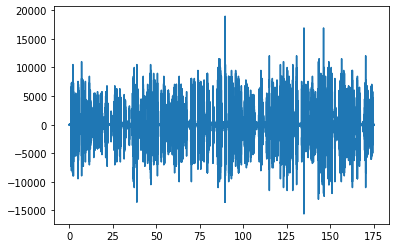

In [5]:
# Visualizing the first audio sample from training data
length = wave_data_training[0].shape[0]/sample_rate_training[0]
time = np.linspace(0., length, wave_data_training[0].shape[0])

plt.plot(time, wave_data_training[0][:], label="Left channel")

In [6]:
# Information regarding audio waves of the data
print('\nShape of Signal:', wave_data.shape[0])
print('Signal Datatype:', wave_data.dtype)
print('Signal duration:', round(wave_data.shape[0] / float(samplerate), 2), 'seconds')


Shape of Signal: 1399419
Signal Datatype: int16
Signal duration: 174.93 seconds


#### Discrete Fourier Transform to get Frequency-Domain

/var/folders/hz/ykc7vvk15svfkvktb082sw240000gn/T/ipykernel_2480/736018076.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_length = np.ceil((sig_length + 1) / 2.0).astype(np.int)


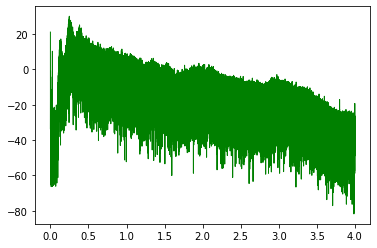

In [7]:
# Working on the same input file
# Extracting the length and the half-length of the signal to input to the foruier transform
sig_length = len(wave_data)
half_length = np.ceil((sig_length + 1) / 2.0).astype(np.int)

# We will now be using the Fourier Transform to form the frequency domain of the signal
signal_freq = np.fft.fft(wave_data)

# Normalize the frequency domain and square it
signal_freq = abs(signal_freq[0:half_length]) / sig_length
signal_freq **= 2
transform_len = len(signal_freq)

# The Fourier transformed signal now needs to be adjusted for both even and odd cases
if sig_length % 2:
    signal_freq[1:transform_len] *= 2
else:
    signal_freq[1:transform_len-1] *= 2
    
# Extract the signal's strength in decibels (dB)
exp_signal = 10 * np.log10(signal_freq)
x_axis = np.arange(0, half_length, 1) * (samplerate / sig_length) / 1000.0
plt.plot(x_axis, exp_signal, color='green', linewidth=1)


#### Extracting MFCC Features


 after mfcc

MFCC Parameters
Window Count = 67
Individual Feature Length = 20


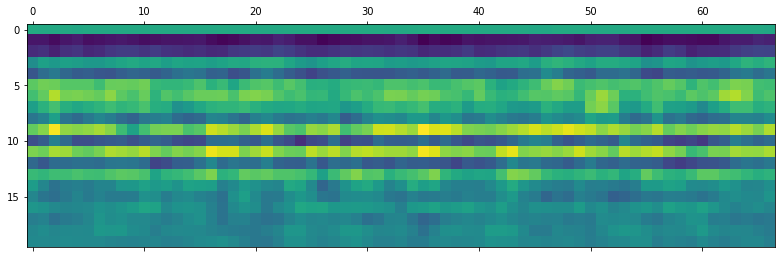

In [32]:
wave_data = wave_data[:15000]
# Using MFCC to extract features from the signal
mfcc_feat = mfcc(wave_data,samplerate, 0.025, 0.01,20,appendEnergy = True,nfft=1104)
mfcc_feat_d = delta(mfcc_feat, 2)
mfcc_feat_d_d = delta(mfcc_feat_d, 2)

print('\n after mfcc')
print('\nMFCC Parameters\nWindow Count =', mfcc_feat.shape[0])
print('Individual Feature Length =', mfcc_feat.shape[1])
mfcc_feat = mfcc_feat.T
plt.matshow(mfcc_feat)

#### Delta Features of MFCC


 after getting delta features from mfcc feat

MFCC Parameters
Window Count = 67
Individual Feature Length = 20


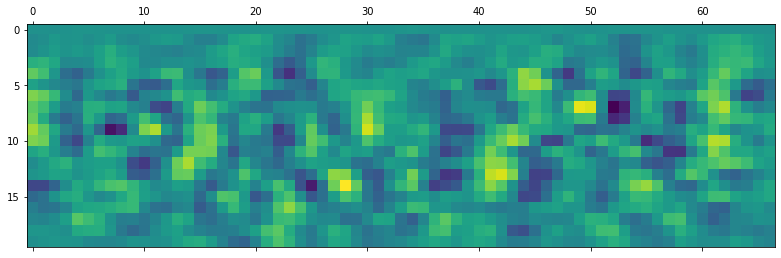

In [33]:
print('\n after getting delta features from mfcc feat')
print('\nMFCC Parameters\nWindow Count =', mfcc_feat_d.shape[0])
print('Individual Feature Length =', mfcc_feat_d.shape[1])
mfcc_feat_d = mfcc_feat_d.T

plt.matshow(mfcc_feat_d)

#### Delta-Delta of MFCC


 after getting delta features from already extracted delta features

MFCC Parameters
Window Count = 67
Individual Feature Length = 20


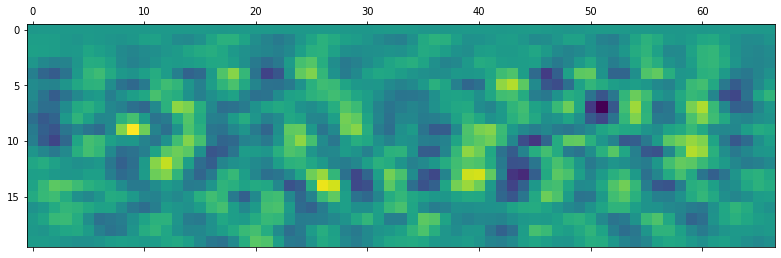

In [34]:
print('\n after getting delta features from already extracted delta features')
print('\nMFCC Parameters\nWindow Count =', mfcc_feat_d_d.shape[0])
print('Individual Feature Length =', mfcc_feat_d_d.shape[1])
mfcc_feat_d_d = mfcc_feat_d_d.T


plt.matshow(mfcc_feat_d_d)

### Pre-processing of MFCC

In [9]:
mfcc_feat = mfcc(wave_data,samplerate, 0.025, 0.01,20,appendEnergy = True,nfft=1104)
mfcc_feat

array([[ 10.33332373, -13.00272961,  -9.2053686 , ...,  -3.35433161,
         -4.23248818,  -0.46399457],
       [ 10.36672599, -12.68606819,  -7.6645796 , ...,  -0.48357702,
          5.22303595,   2.41982683],
       [ 10.39494378, -11.96239831,  -6.46277894, ...,   1.13509123,
          2.54343443,   1.92350635],
       ...,
       [ 17.63290088,   7.46773666,   6.8905042 , ...,   9.12884975,
          0.30702385,   0.7772795 ],
       [ 16.73178121,   8.3969191 ,   5.47989042, ...,   1.71992099,
          0.02349319,  -0.10286121],
       [ 16.7922154 ,   5.51114524,   5.72042952, ...,   4.35741885,
          2.7104205 ,  -0.80737811]])

In [10]:
mfcc_feat = preprocessing.scale(mfcc_feat)
mfcc_feat

array([[-0.97525603, -1.24295495, -0.80421365, ..., -1.33485542,
        -1.60033491, -0.20802617],
       [-0.96545043, -1.20581402, -0.57303127, ..., -0.55141535,
         1.64257878,  1.19186235],
       [-0.95716678, -1.12093544, -0.39271122, ..., -0.10967449,
         0.72356928,  0.95093435],
       ...,
       [ 1.16761674,  1.15800736,  1.61083622, ...,  2.07185326,
        -0.04344124,  0.39452339],
       [ 0.90308295,  1.26699032,  1.39918553, ...,  0.04992782,
        -0.14068233, -0.03272182],
       [ 0.92082409,  0.92852054,  1.43527639, ...,  0.76971123,
         0.78083966, -0.37471426]])

In [11]:
 # Function to extract the features
def extract_features(audio,rate):
    """extract 20 dim mfcc features from an audio, performs CMS and combines
    delta to make it 40 dim feature vector"""   
 
    # MFCC features
    mfcc_feat = mfcc(audio,rate, 0.025, 0.01,20,appendEnergy = True,nfft=1104)
    mfcc_feat = preprocessing.scale(mfcc_feat)
    # delta features
    d = delta(mfcc_feat, 2)
    d_d= delta(d, 2)
    # returning a horizontal stack of mfcc and delta features
    combined = np.hstack((mfcc_feat,d))
    return combined

In [12]:
models = []
# Extracting features for each speaker
for sample_audio , sample_rate in zip( wave_data_training , sample_rate_training):
    vector   = extract_features(sample_audio,sample_rate)
    # creating a model for extracted features
    gmm = GaussianMixture(n_components = 16, max_iter = 200, covariance_type='diag',n_init = 3)
    gmm.fit(vector)
    # saving the model
    models.append(gmm)

done


In [15]:
# Likelihood list stores the likelihood scores
likelihood_list = []
# Stores the prediected classes
predicted_class_list = []
for sample_audio , sample_rate in zip( wave_data_testing , sample_rate_testing):
    # Extract features
    vector   = extract_features(sample_audio,sample_rate)
    likelihood = np.zeros(len(models))
    # Check it against the models
    for i in range(len(models)):
        gmm = models[i]
        scores = np.array(gmm.score(vector))
        likelihood[i] = scores.sum()
    likelihood_list.append(likelihood)
    print(likelihood,"\n")
    # Set the winner
    winner = np.argmax(likelihood) + 1
    predicted_class_list.append(winner)
    print(winner , "\n")


[-28.27473997 -26.99619605 -25.0642919  -33.96410727 -34.26055688] 

3 

[-28.16251156 -26.97725594 -25.43314236 -16.73668169 -22.39369317] 

4 

[-27.00564038 -25.62245884 -24.88921441 -20.66879987 -15.19630261] 

5 

[-26.96348051 -25.94090626 -24.71620493 -20.20157797 -19.34307735] 

5 

[-26.38499744 -26.26721107 -25.15191422 -22.97344055 -21.44182919] 

5 



In [16]:
# Stores the list of the samples being tested
testing_class_list =[3,4,5,6,7]

df = pd.DataFrame(likelihood_list)
df.columns = ['Sample_1_classifier', 'Sample_2_classifier','Sample_3_classifier','Sample_4_classifier','Sample_5_classifier' ]
df.index =['Test_sample_1', 'Test_sample_2','Test_sample_3','Test_sample_4','Test_sample_5']

df

,Sample_1_classifier,Sample_2_classifier,Sample_3_classifier,Sample_4_classifier,Sample_5_classifier
Test_sample_1,-28.274740,-26.996196,-25.064292,-33.964107,-34.260557
Test_sample_2,-28.162512,-26.977256,-25.433142,-16.736682,-22.393693
Test_sample_3,-27.005640,-25.622459,-24.889214,-20.668800,-15.196303
Test_sample_4,-26.963481,-25.940906,-24.716205,-20.201578,-19.343077
Test_sample_5,-26.384997,-26.267211,-25.151914,-22.973441,-21.441829


#### Confusion Matrix (Expected accuracy - 0.6)

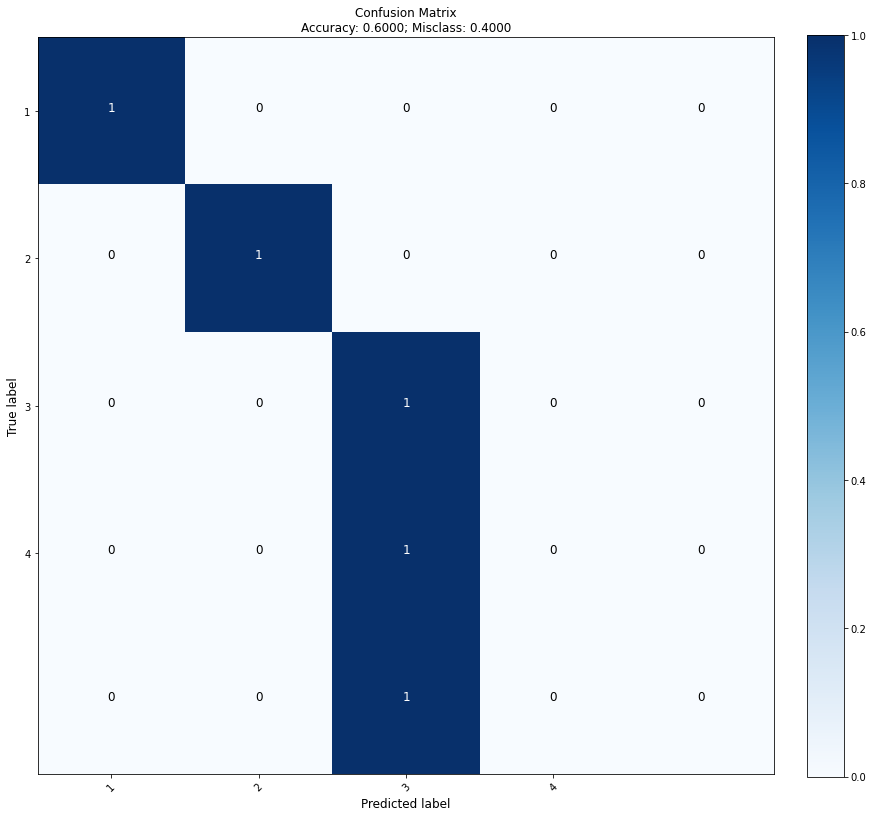

In [17]:
confusionMatrix = confusion_matrix(testing_class_list, predicted_class_list)

plot_confusion_matrix(cm=confusionMatrix,
                      target_names = [i for i in range(1, 5)])

## Testing Models with all Genuine Samples

In [19]:
# Stores the new testing sample
sample_rate_testing_2 = []
wave_data_testing_2 = []

# Reads the Samples
for i in range(test_samples):
    samplerate_te , wave_data_te = wavfile.read(num + '%d'%(i+1) + test_addr )
    
    # append the samples
    sample_rate_testing_2.append(samplerate_te)
    wave_data_testing_2.append(wave_data_te)



In [20]:
# Stores the new models
models2 = []

# train the models again
for sample_audio , sample_rate in zip( wave_data_training , sample_rate_training):
    # Extract the features
    vector   = extract_features(sample_audio,sample_rate)
    gmm = GaussianMixture(n_components = 16, max_iter = 200, covariance_type='diag',n_init = 3)
    gmm.fit(vector)
    # Save the models to list
    models2.append(gmm

done


In [21]:
# Stores likelihood numbers
likelihood_list2 = []
# Stores the predicted class
predicted_class_list2 = []

for sample_audio , sample_rate in zip( wave_data_testing_2 , sample_rate_testing_2):
    # Extract the features from the testing data
    vector   = extract_features(sample_audio,sample_rate)
    likelihood = np.zeros(len(models2))
    
    # Compare them against the pre-recorded models
    for i in range(len(models2)):
        gmm = models2[i]
        scores = np.array(gmm.score(vector))
        likelihood[i] = scores.sum()
    # Stores the likelihood scores
    likelihood_list2.append(likelihood)
    print(likelihood,"\n")
    # Decide the winner from likelihood
    winner = np.argmax(likelihood) + 1
    predicted_class_list2.append(winner)
    print(winner , "\n")

[-31.2008572  -31.84196912 -31.91867414 -37.42622048 -36.89258308] 

1 

[-29.70503746 -28.86717184 -29.49088047 -35.9621192  -35.37733609] 

2 

[-28.25357909 -26.84157687 -25.01966635 -34.31855278 -34.25218007] 

3 

[-27.5226296  -27.0407792  -25.74108822 -16.46497392 -22.25178447] 

4 

[-26.86479281 -25.5026667  -25.12822643 -20.58957797 -15.18565865] 

5 



In [22]:
# Stores the testing class list
testing_class_list2 =[1,2,3,4,5]

df = pd.DataFrame(likelihood_list)
df.columns = ['Sample_1_classifier', 'Sample_2_classifier','Sample_3_classifier','Sample_4_classifier','Sample_5_classifier' ]
df.index =['Test_sample_1', 'Test_sample_2','Test_sample_3','Test_sample_4','Test_sample_5']

df

,Sample_1_classifier,Sample_2_classifier,Sample_3_classifier,Sample_4_classifier,Sample_5_classifier
Test_sample_1,-28.274740,-26.996196,-25.064292,-33.964107,-34.260557
Test_sample_2,-28.162512,-26.977256,-25.433142,-16.736682,-22.393693
Test_sample_3,-27.005640,-25.622459,-24.889214,-20.668800,-15.196303
Test_sample_4,-26.963481,-25.940906,-24.716205,-20.201578,-19.343077
Test_sample_5,-26.384997,-26.267211,-25.151914,-22.973441,-21.441829


#### Confusion Matrix (Expected accuracy - 1)

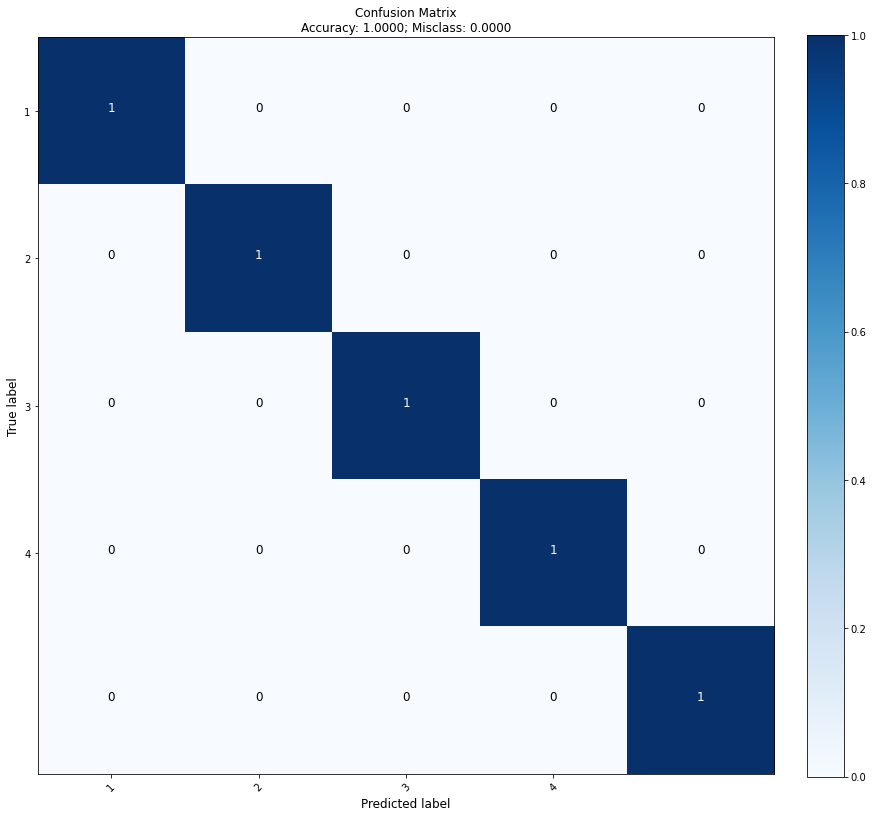

In [23]:
confusionMatrix = confusion_matrix(testing_class_list2, predicted_class_list2)

# plotting the confusion matrix
plot_confusion_matrix(cm=confusionMatrix,
                      target_names = [i for i in range(1, 5)])